In [1]:
#!pip install pmdarima

In [2]:
# For data manipulation 
import pandas as pd
import numpy as np
from datetime import datetime

#For data visualization 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

#for ignore the warning 
import warnings
warnings.filterwarnings('ignore')

#For data modeling
from statsmodels.tsa.ar_model import AutoReg
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

#For metrics 
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller

In [3]:
df=pd.read_csv("C:\\Users\\arunn\\Downloads\\Mon data - Sheet1.csv")

In [4]:
df.head()

Date  Day      Open      High       Low     Close  Adj Close  \
0  2004-08-23  Mon  2.758411  2.826406  2.716070  2.724787   2.724787   
1  2004-08-30  Mon  2.622171  2.627402  2.540727  2.540727   2.540727   
2  2004-09-13  Mon  2.655795  2.700129  2.651561  2.677464   2.677464   
3  2004-09-20  Mon  2.912832  3.028648  2.908349  2.972857   2.972857   
4  2004-09-27  Mon  2.977838  3.010715  2.934003  2.945460   2.945460   

      Volume  
0  366857939  
1  104429967  
2  157628624  
3  213585582  
4  141994242

In [5]:
df.tail()

Date  Day        Open        High         Low       Close  \
904  2023-11-06  Mon  130.220001  131.559998  129.929993  131.449997   
905  2023-11-13  Mon  133.360001  134.110001  132.770004  133.639999   
906  2023-11-20  Mon  135.500000  138.425003  135.490005  137.919998   
907  2023-11-27  Mon  137.570007  139.630005  137.539993  138.050003   
908  2023-12-04  Mon  131.294006  131.449997  129.399994  130.630005   

      Adj Close    Volume  
904  131.449997  15360400  
905  133.639999  16409900  
906  137.919998  19569400  
907  138.050003  17886400  
908  130.630005  24117100

In [6]:
#convert data time[obj-->int]
pd.to_datetime(df.Date)
df['Date'] = pd.to_datetime(df.Date)

In [7]:
#setting the date attribute to index
df= df.set_index('Date')
df

Day        Open        High         Low       Close   Adj Close  \
Date                                                                          
2004-08-23  Mon    2.758411    2.826406    2.716070    2.724787    2.724787   
2004-08-30  Mon    2.622171    2.627402    2.540727    2.540727    2.540727   
2004-09-13  Mon    2.655795    2.700129    2.651561    2.677464    2.677464   
2004-09-20  Mon    2.912832    3.028648    2.908349    2.972857    2.972857   
2004-09-27  Mon    2.977838    3.010715    2.934003    2.945460    2.945460   
...         ...         ...         ...         ...         ...         ...   
2023-11-06  Mon  130.220001  131.559998  129.929993  131.449997  131.449997   
2023-11-13  Mon  133.360001  134.110001  132.770004  133.639999  133.639999   
2023-11-20  Mon  135.500000  138.425003  135.490005  137.919998  137.919998   
2023-11-27  Mon  137.570007  139.630005  137.539993  138.050003  138.050003   
2023-12-04  Mon  131.294006  131.449997  129.399994  130.630005  130.630005   

               Volume  
Date                   
2004-08-23  366857939  
2004-08-30  104429967  
2004-09-13  157628624  
2004-09-20  213585582  
2004-09-27  141994242  
...               ...  
2023-11-06   15360400  
2023-11-13   16409900  
2023-11-20   19569400  
2023-11-27   17886400  
2023-12-04   24117100  

[909 rows x 7 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 909 entries, 2004-08-23 to 2023-12-04
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Day        909 non-null    object 
 1   Open       909 non-null    float64
 2   High       909 non-null    float64
 3   Low        909 non-null    float64
 4   Close      909 non-null    float64
 5   Adj Close  909 non-null    float64
 6   Volume     909 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 56.8+ KB


In [9]:
df.describe().T

count          mean           std            min           25%  \
Open       909.0  4.133218e+01  3.847094e+01       2.622171  1.292680e+01   
High       909.0  4.178390e+01  3.891476e+01       2.627402  1.300301e+01   
Low        909.0  4.093238e+01  3.811776e+01       2.540727  1.277786e+01   
Close      909.0  4.138195e+01  3.855770e+01       2.540727  1.291136e+01   
Adj Close  909.0  4.138195e+01  3.855770e+01       2.540727  1.291136e+01   
Volume     909.0  1.129883e+08  1.428896e+08  216593.000000  2.791200e+07   

                    50%           75%           max  
Open       2.651371e+01  5.722250e+01  1.501418e+02  
High       2.670600e+01  5.791400e+01  1.510345e+02  
Low        2.622899e+01  5.657215e+01  1.491200e+02  
Close      2.642345e+01  5.751700e+01  1.493880e+02  
Adj Close  2.642345e+01  5.751700e+01  1.493880e+02  
Volume     5.734200e+07  1.422432e+08  1.548270e+09

In [10]:
df.columns

Index(['Day', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [11]:
df.shape

(909, 7)

In [12]:
#checking for null values
df.isnull().sum()

Day          0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [13]:
def plot_attribute(df, attritube ,start='2004', end='2021',color ='GREEN'):
    fig, ax = plt.subplots(1, figsize=(20,5))
    ax.plot(df[start:end].index, df[start:end][attritube],'tab:{}'.format(color))
    ax.set_title("Google Stocks {} from 2004 to 2023".format(attritube))
    
    ax.axhline(y=df[start:end].describe()[attritube]["max"],linewidth=2, color='m')
    ax.axhline(y=df[start:end].describe()[attritube]["min"],linewidth=2, color='c')
    ax.axvline(x=df[attritube].idxmax(),linewidth=2, color='b')
    ax.axvline(x=df[attritube].idxmin() ,linewidth=2, color='y')
    
    ax.text(x=df[attritube].idxmin(),
            y=df[start:end].describe()[attritube]["min"],
            s='MINIMUM',
            horizontalalignment='left',
            verticalalignment='top',
            color='BLACK',
            fontsize=20)
    
    ax.text(x=df[attritube].idxmax(),
            y=df[start:end].describe()[attritube]["max"],
            s='MAXIMUM',
            horizontalalignment='right',
            verticalalignment='bottom',
            color='RED',
            fontsize=20)
     
    plt.show()
    print("Max Traded Value :  ",df[start:end].describe()[attritube]["max"])
    print("Min Traded Value :  ",df[start:end].describe()[attritube]["min"])

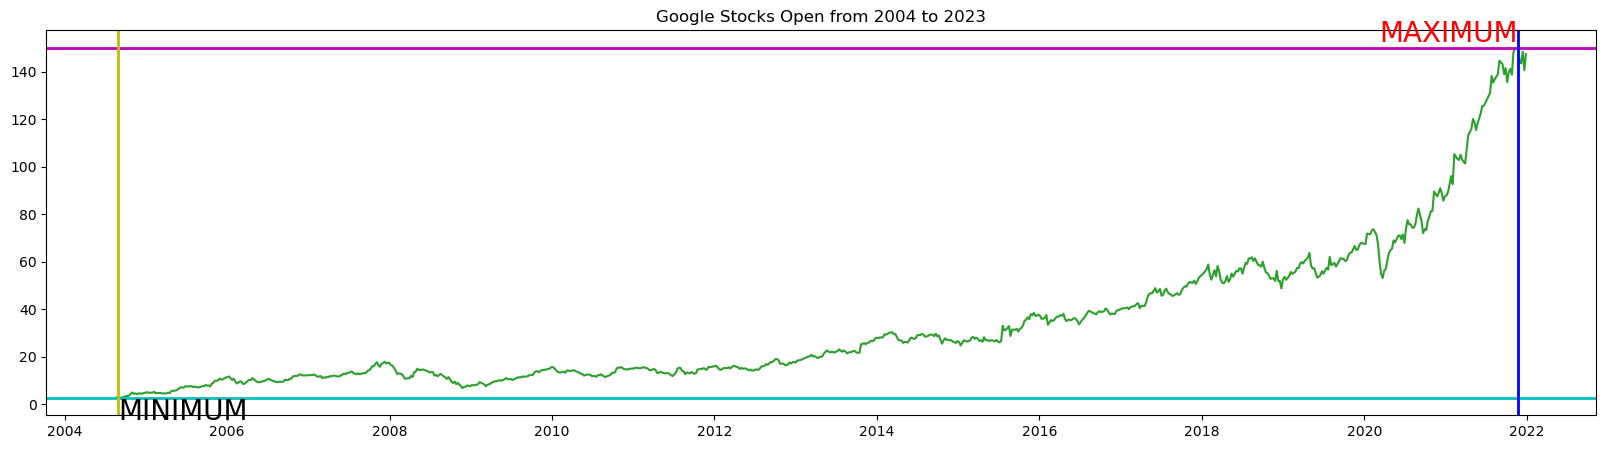

Max Traded Value :   150.141754
Min Traded Value :   2.622171


In [14]:
plot_attribute(df,'Open')

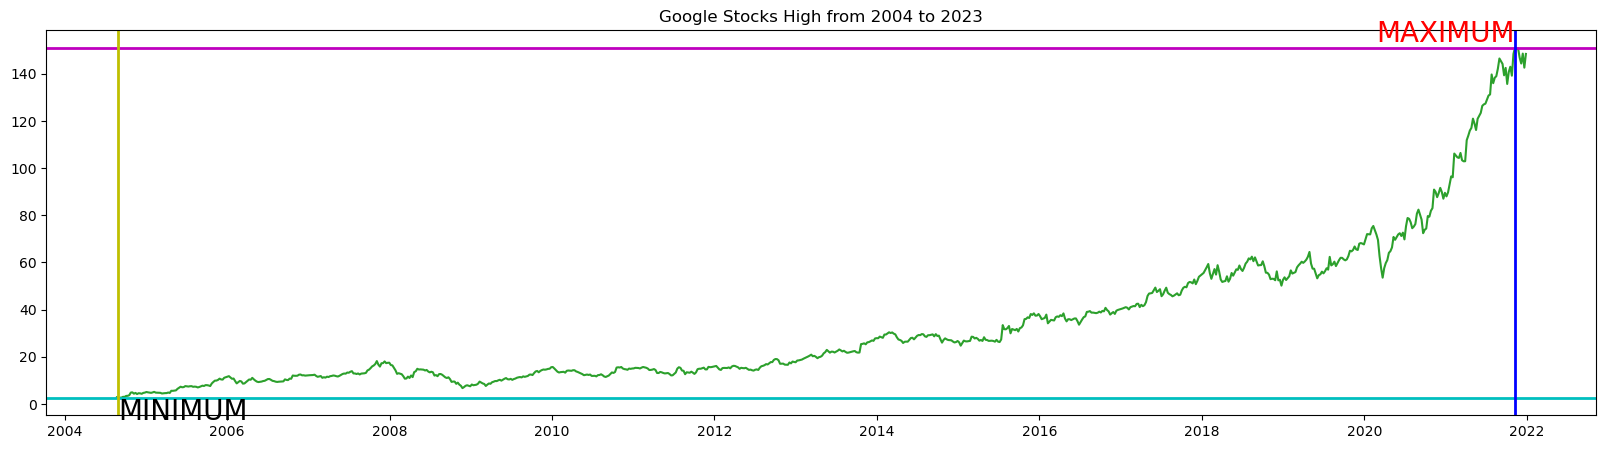

Max Traded Value :   151.0345
Min Traded Value :   2.627402


In [15]:
plot_attribute(df,'High')

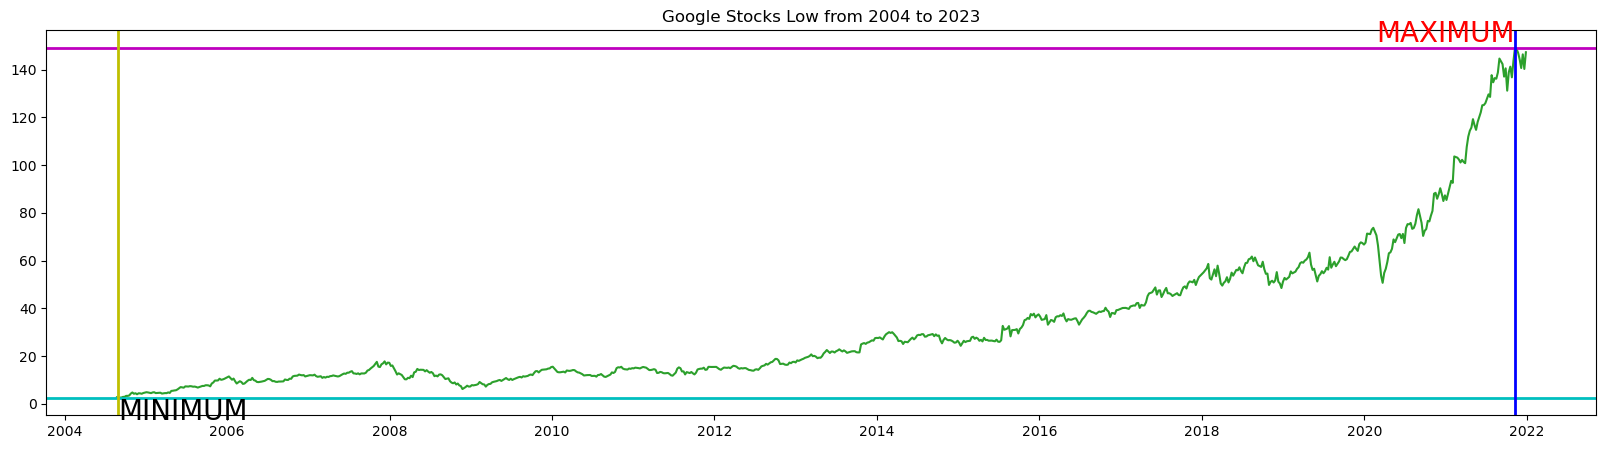

Max Traded Value :   149.119995
Min Traded Value :   2.540727


In [16]:
plot_attribute(df,'Low')

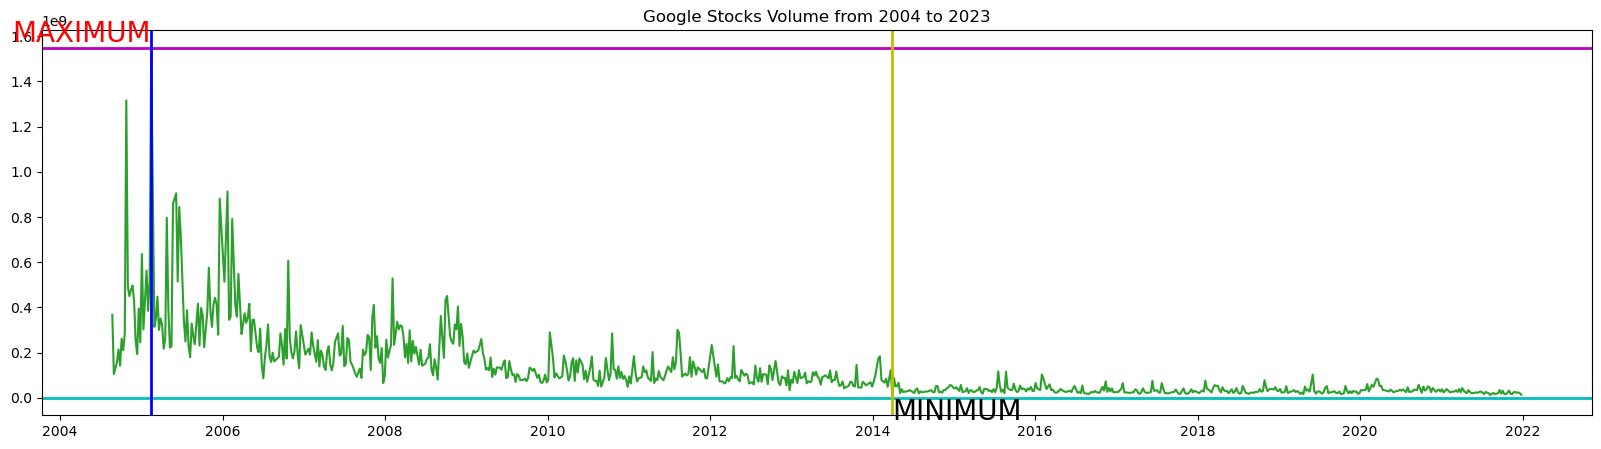

Max Traded Value :   1548269624.0
Min Traded Value :   216593.0


In [17]:
plot_attribute(df,'Volume')

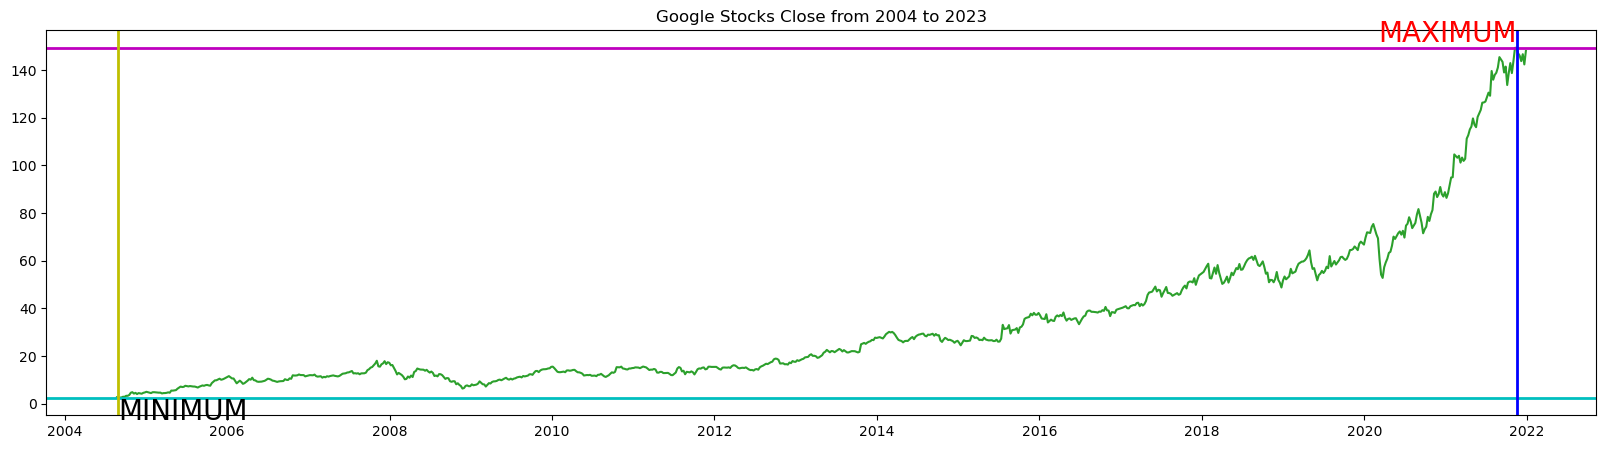

Max Traded Value :   149.388
Min Traded Value :   2.540727


In [18]:
plot_attribute(df,'Close')

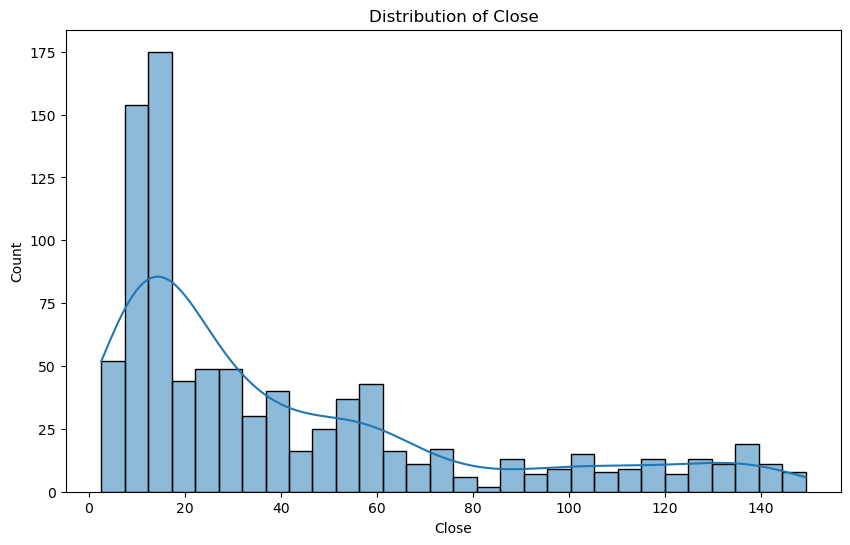

In [19]:
#distribution plot 
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=30, kde=True)
plt.title('Distribution of Close')
plt.show()

<Axes: xlabel='Close', ylabel='Density'>

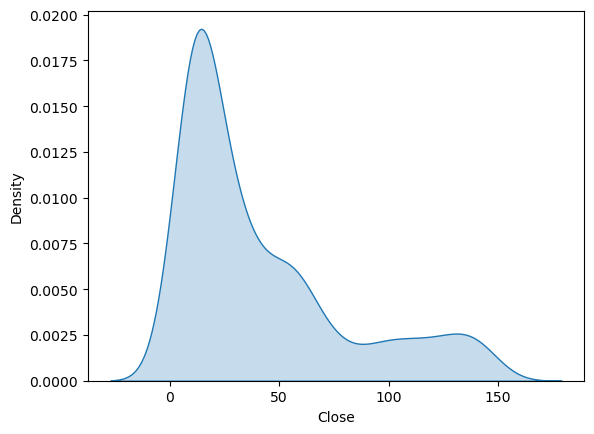

In [20]:
#kedplot
sns.kdeplot(df['Close'], shade=True)

<Figure size 1500x800 with 0 Axes>

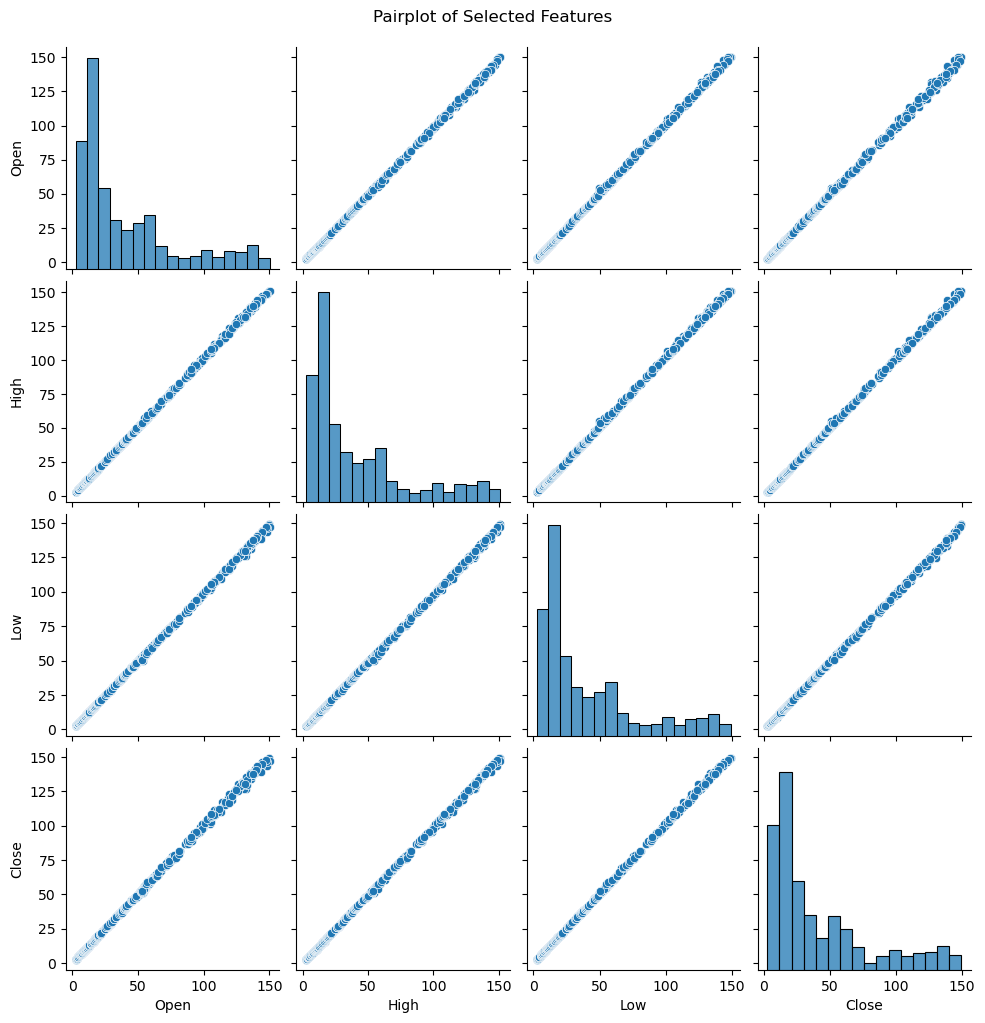

In [21]:
#pairplot
plt.figure(figsize=(15, 8))
sns.pairplot(df[['Open', 'High', 'Low', 'Close']])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

<Axes: xlabel='Date', ylabel='Close'>

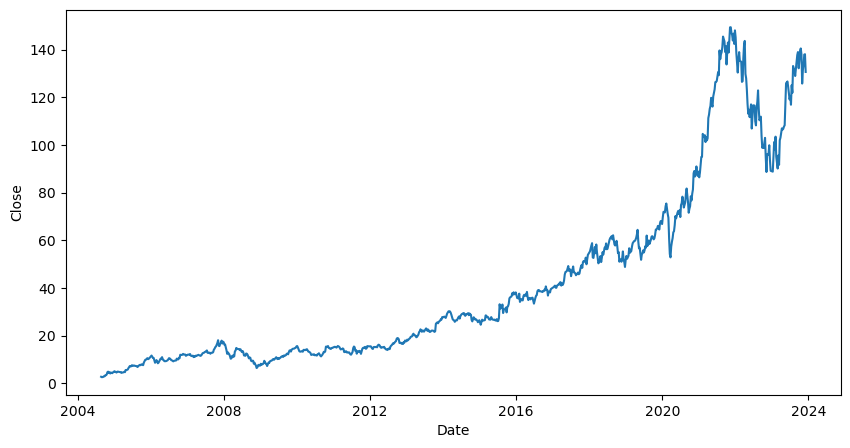

In [22]:
#the graph has a upper trend
plt.figure(figsize =(10,5))
sns.lineplot(data = df,x=df.index,y=df.Close)

In [23]:
fig = px.line(df,x=df.index,y="Close",title="Closing Price: Range Slider and Selectors")
fig.update_xaxes(rangeslider_visible=True,rangeselector=dict(
    buttons=list([
        dict(count=1,label="1m",step="month",stepmode="backward"),
        dict(count=6,label="6m",step="month",stepmode="backward"),
        dict(count=1,label="YTD",step="year",stepmode="todate"),
        dict(count=1,label="1y",step="year",stepmode="backward"),
        dict(step="all")])))

In [24]:
df= df[['Close']]

In [25]:
#Rolling Mean
rollMean = df.Close.rolling(window=12).mean()
rollMean

Date
2004-08-23           NaN
2004-08-30           NaN
2004-09-13           NaN
2004-09-20           NaN
2004-09-27           NaN
                 ...    
2023-11-06    134.306666
2023-11-13    134.457499
2023-11-20    135.206666
2023-11-27    135.728334
2023-12-04    135.135834
Name: Close, Length: 909, dtype: float64

In [26]:
#Rolling Std
rollStd  = df.Close.rolling(window=12).std()
rollStd

Date
2004-08-23         NaN
2004-08-30         NaN
2004-09-13         NaN
2004-09-20         NaN
2004-09-27         NaN
                ...   
2023-11-06    4.667311
2023-11-13    4.608878
2023-11-20    4.352218
2023-11-27    4.280029
2023-12-04    4.464390
Name: Close, Length: 909, dtype: float64

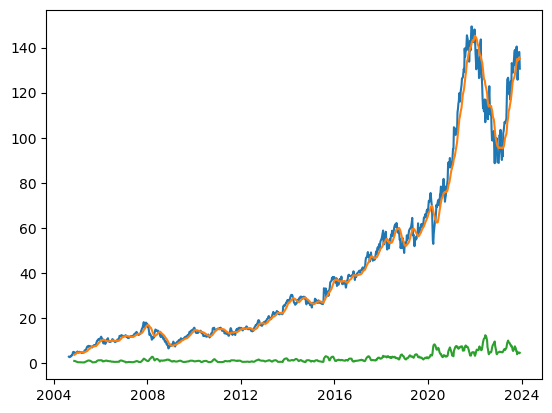

In [27]:
#plotting the ROlling mean and Rolling Standard Deviation of Time series Data (Before Smoothning)
plt.plot(df.Close)
plt.plot(rollMean)
plt.plot(rollStd)

In [28]:
rollMean = df.Close.rolling(window=30).mean()  ##smoothning by changing the rolling mean values
rollStd = df.Close.rolling(window=30).std()   ##smoothning by changing the rolling std values

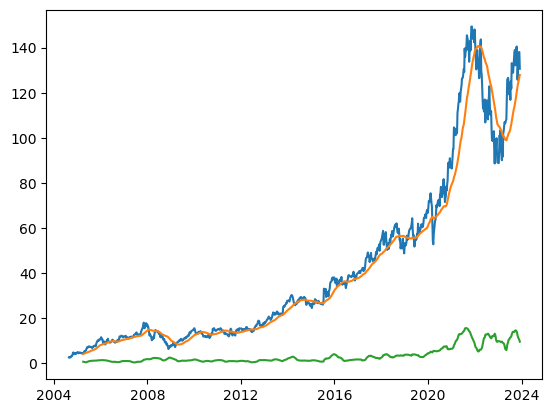

In [29]:
#After Smoothning
plt.plot(df.Close)
plt.plot(rollMean)
plt.plot(rollStd)

In [30]:
#SIMPLE MOVING AVERAGE

In [31]:
#SMA
df['SMA_5'] = df['Close'].rolling(5).mean().shift()
df['SMA_15'] = df['Close'].rolling(15).mean().shift()


# If u want to visualize between a range of specific dates u can do it like -> fig = go.Figure(layout_xaxis_range=['2000-01-03','2021-07-07'])

fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index,y=df.SMA_5,name='SMA_5'))
fig.add_trace(go.Scatter(x=df.index,y=df.SMA_15,name='SMA_15'))
fig.add_trace(go.Scatter(x=df.index,y=df.Close,name='Close', opacity=0.3))
fig.show()

In [32]:
#EXPONENTIAL MOVING AVERAGE¶

In [33]:
#EMA

df['EMA_5'] = df['Close'].ewm(5).mean().shift()
df['EMA_15'] = df['Close'].ewm(15).mean().shift()

# If u want to visualize between a range of specific dates u can do it like -> fig = go.Figure(layout_xaxis_range=['2000-01-03','2021-07-07'])

fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index,y=df.EMA_5,name='EMA_5'))
fig.add_trace(go.Scatter(x=df.index,y=df.EMA_15,name='EMA_15'))
fig.add_trace(go.Scatter(x=df.index,y=df.Close,name='Close', opacity=0.3))
fig.show()

In [34]:
# Now lets compare SMA's and EMA's

fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index,y=df.SMA_5,name='SMA_5'))
fig.add_trace(go.Scatter(x=df.index,y=df.EMA_5,name='EMA_5'))
fig.add_trace(go.Scatter(x=df.index,y=df.Close,name='Close', opacity=0.3))
fig.show()
# EMA_5 is performing better than SMA_5 as it is closer to CLosing price of Stock.

In [35]:
#Augmented Dickey Fuller Test
#Tests for trend non-stationarity
#Null hypothesis is time series is non-stationary

In [36]:
Adftest = adfuller(df['Close'],autolag='AIC')
Adftest

(-0.2457515974438331,
 0.9328438595447496,
 17,
 891,
 {'1%': -3.437710538229776,
  '5%': -2.864789273176045,
  '10%': -2.568500137640276},
 3973.524030310491)

In [37]:
#indexing on adft values
stats = pd.Series(Adftest[0:4],index = ['Test Statistics','P-value','lags used','Number of observations used'])
stats

Test Statistics                 -0.245752
P-value                          0.932844
lags used                       17.000000
Number of observations used    891.000000
dtype: float64

In [38]:
for key,values in Adftest[4].items():
    print('criticality',key,":",values)

criticality 1% : -3.437710538229776
criticality 5% : -2.864789273176045
criticality 10% : -2.568500137640276


In [39]:
#Creating a function where all stationarity details should be present

#Test for Stationarity
def test_stationarity(dataFrame):
    
    #Determining rolling statistics
    rollMean = dataFrame.rolling(window=12).mean()  #rolling mean
    rollStd = dataFrame.rolling(window=12).std()   #rolling std
    
    print("Results of Dickey fuller test")
    from statsmodels.tsa.stattools import adfuller
    adfTest = adfuller(dataFrame.index,autolag='AIC')
    stats = pd.Series(adfTest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
    print(stats)
    
    for key, values in adfTest[4].items():
        print('criticality',key,":",values)
     
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(dataFrame, color='blue',label='Original', linewidth = 3)
    plt.plot(rollMean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rollStd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20,
    shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)

Results of Dickey fuller test
Test Statistic                   2.630949
p-value                          0.999080
#lags used                      18.000000
number of observations used    890.000000
dtype: float64
criticality 1% : -3.43771883253448
criticality 5% : -2.8647929301713977
criticality 10% : -2.568502085595253


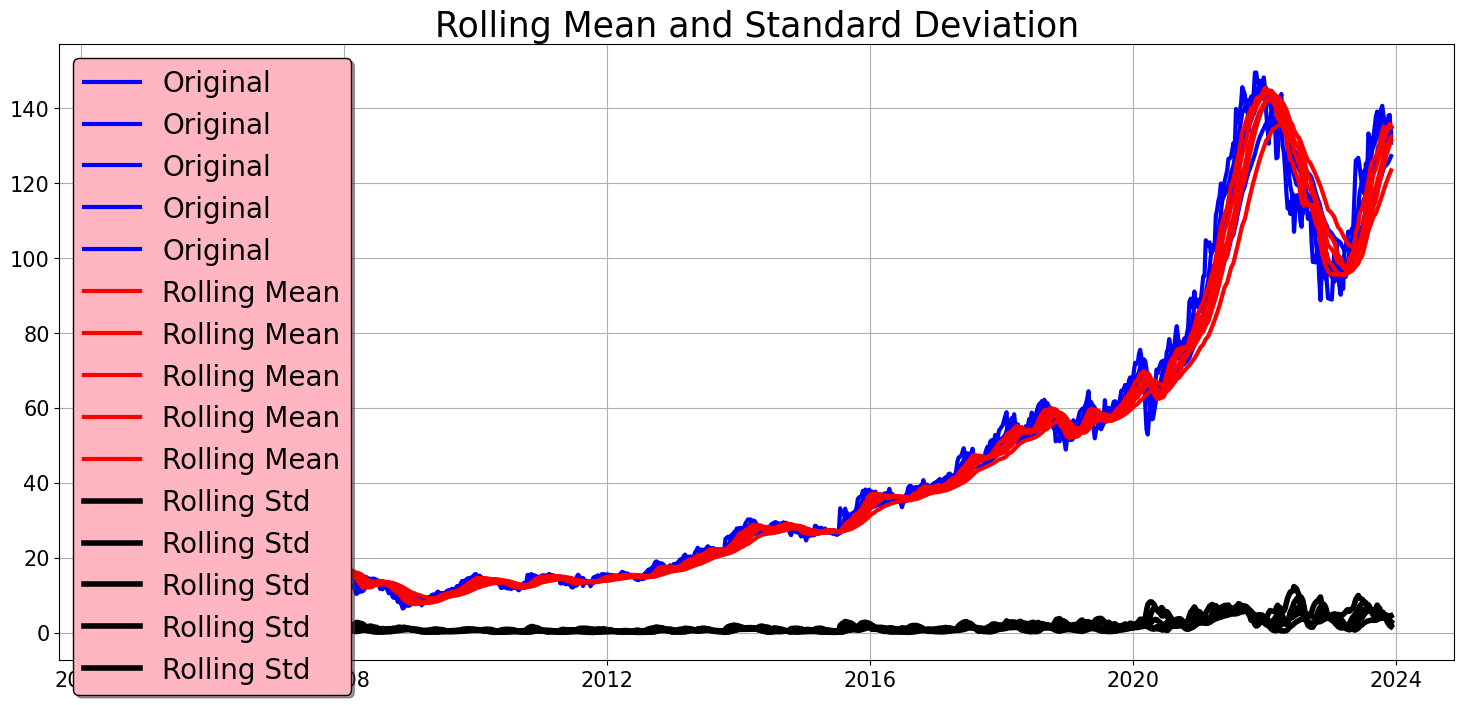

In [40]:
test_stationarity(df)

In [41]:
#Outlier Detection

<Axes: >

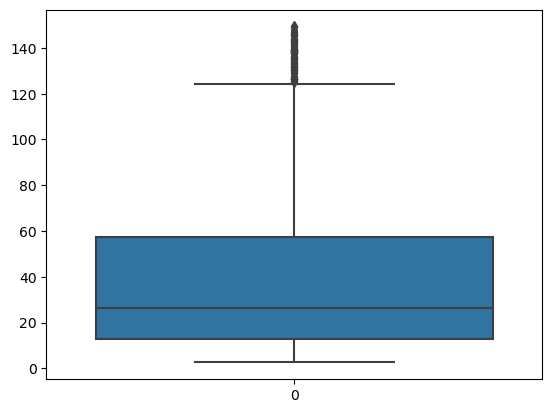

In [42]:
sns.boxplot(df.Close)

In [43]:
#Time Series Decomposition

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Close'],model = 'additive',period = 12)
result

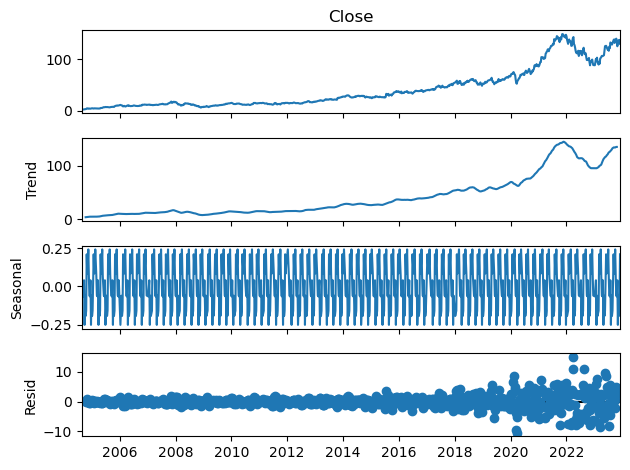

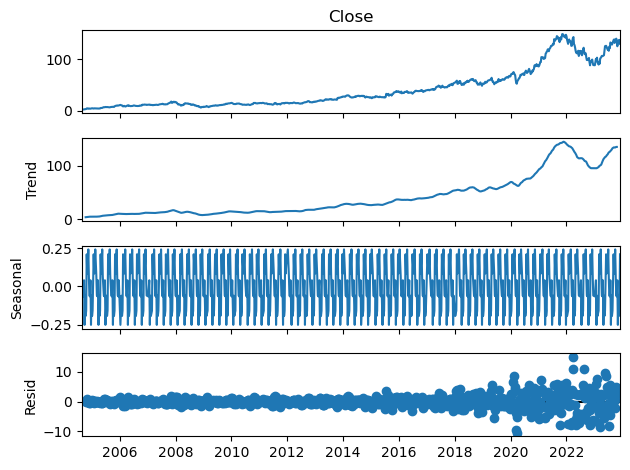

In [45]:
#plotting the result
result.plot()

In [46]:
#ACF AND PACF

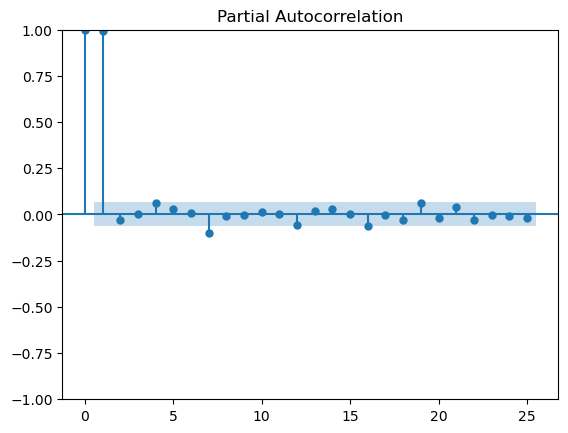

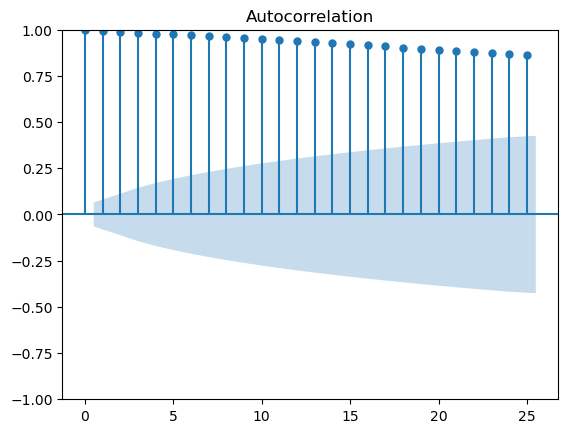

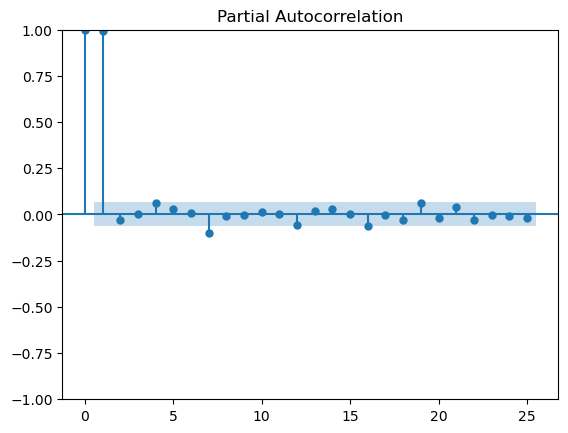

In [47]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df.Close,lags= 25)
plot_pacf(df.Close,lags = 25)

In [48]:
#non stationarity to stationarity
df_close = df['Close']
df_close

Date
2004-08-23      2.724787
2004-08-30      2.540727
2004-09-13      2.677464
2004-09-20      2.972857
2004-09-27      2.945460
                 ...    
2023-11-06    131.449997
2023-11-13    133.639999
2023-11-20    137.919998
2023-11-27    138.050003
2023-12-04    130.630005
Name: Close, Length: 909, dtype: float64

In [49]:
#changing value in diff
df_close.diff(2)

Date
2004-08-23         NaN
2004-08-30         NaN
2004-09-13   -0.047323
2004-09-20    0.432130
2004-09-27    0.267996
                ...   
2023-11-06   -6.449997
2023-11-13    7.889999
2023-11-20    6.470001
2023-11-27    4.410004
2023-12-04   -7.289993
Name: Close, Length: 909, dtype: float64

In [50]:
df_close = df_close.diff()
df_close =df_close.dropna()
df_close

Date
2004-08-30   -0.184060
2004-09-13    0.136737
2004-09-20    0.295393
2004-09-27   -0.027397
2004-10-04    0.418431
                ...   
2023-11-06    5.699997
2023-11-13    2.190002
2023-11-20    4.279999
2023-11-27    0.130005
2023-12-04   -7.419998
Name: Close, Length: 908, dtype: float64

Results of Dickey fuller test
Test Statistic                   2.623722
p-value                          0.999079
#lags used                      18.000000
number of observations used    889.000000
dtype: float64
criticality 1% : -3.4377271455534597
criticality 5% : -2.864796595407904
criticality 10% : -2.5685040379415454


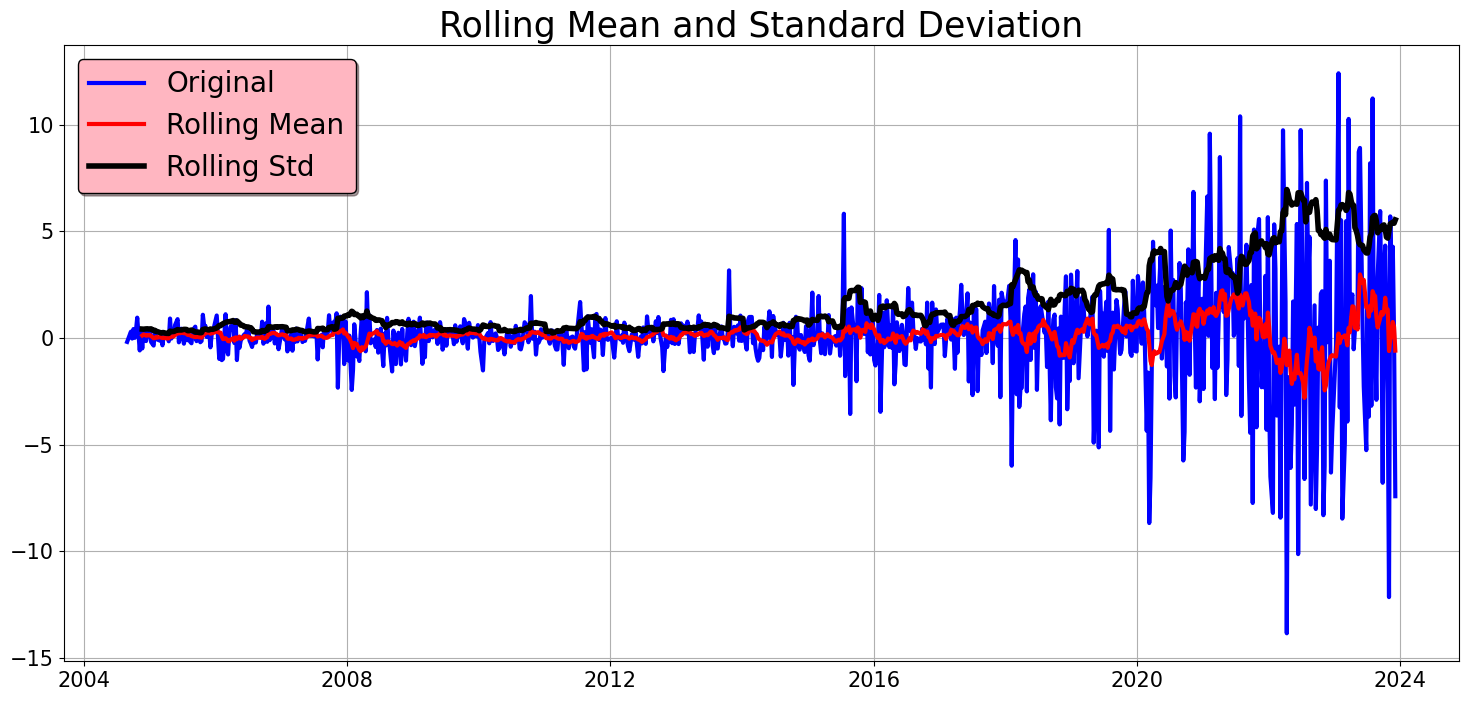

In [51]:
#now passing the data into test-stationarity function
test_stationarity(df_close)

In [52]:
#train test split our data
df_close[0:-40]

Date
2004-08-30    -0.184060
2004-09-13     0.136737
2004-09-20     0.295393
2004-09-27    -0.027397
2004-10-04     0.418431
                ...    
2022-12-12    -6.310005
2022-12-19    -4.409996
2023-01-09    -0.349999
2023-01-23    12.409996
2023-01-30    -3.260002
Name: Close, Length: 868, dtype: float64

In [53]:
train_data = df_close[:round(len(df_close)*70/100)]
test_data = df_close[round(len(df_close)*70/100):]
test_data.tail()

Date
2023-11-06    5.699997
2023-11-13    2.190002
2023-11-20    4.279999
2023-11-27    0.130005
2023-12-04   -7.419998
Name: Close, dtype: float64

In [54]:
train_data.shape,test_data.shape

((636,), (272,))

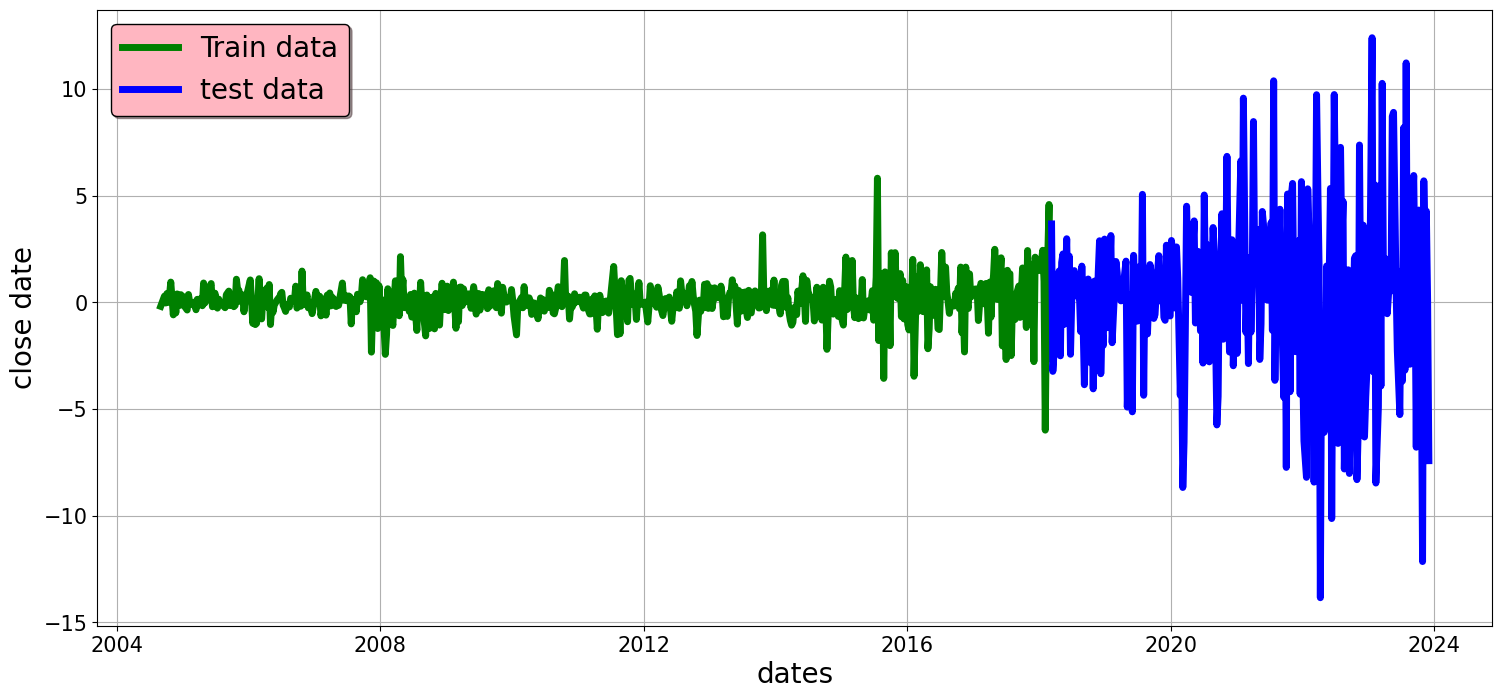

In [55]:
#lotting the train test splitted in graph
train_data = df_close[:round(len(df_close)*70/100)]
test_data = df_close[round(len(df_close)*70/100):]
plt.figure(figsize= (18,8))
plt.grid(True)
plt.xlabel('dates', fontsize = 20 )
plt.ylabel('close date', fontsize = 20)
plt.xticks(fontsize = 15 )
plt.yticks(fontsize = 15 )
plt.plot(train_data, 'green', label = 'Train data', linewidth = 5)
plt.plot(test_data, 'blue', label = 'test data', linewidth = 5)
plt.legend(fontsize = 20, shadow = True, facecolor = 'lightpink', edgecolor ='k')

In [56]:
#Model Building

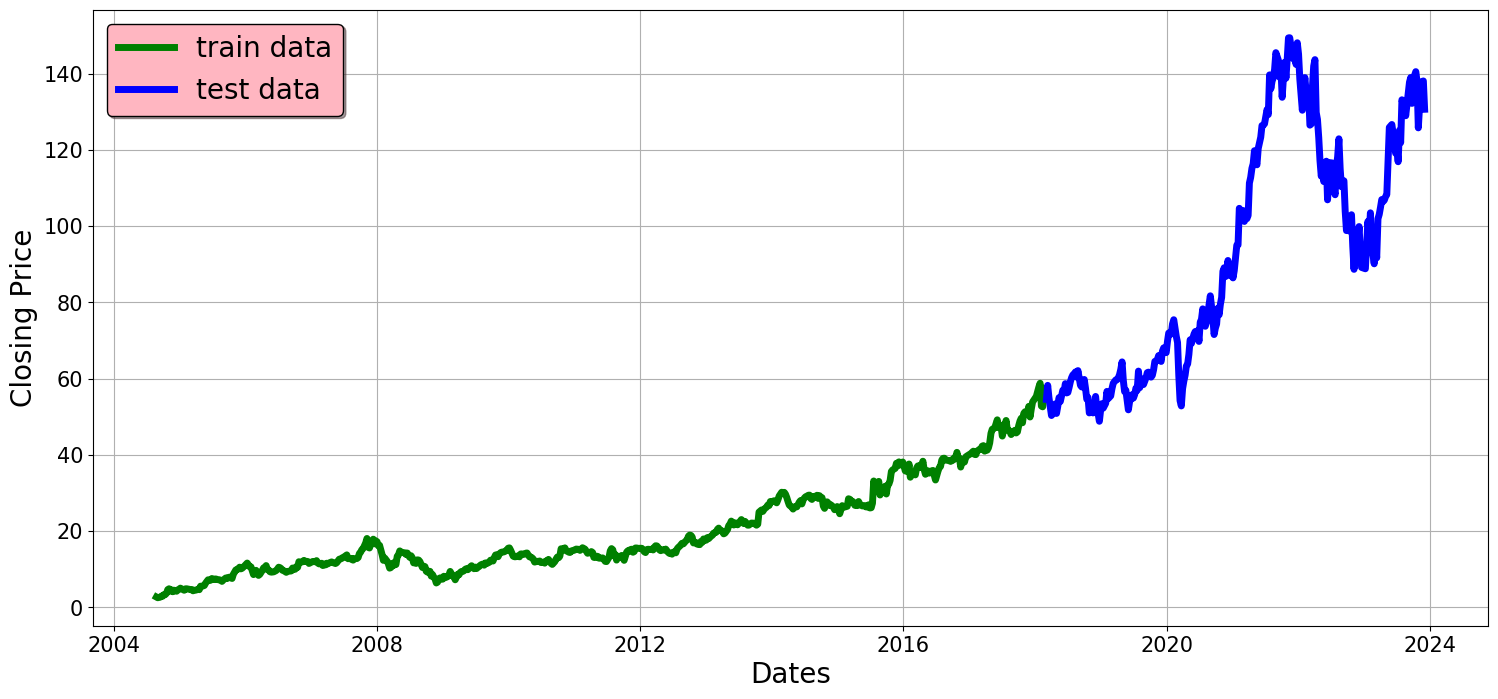

In [57]:
train_data = df['Close'][:round(len(df_close)*70/100)] ##train_data
test_data =df['Close'][round(len(df_close)*70/100):] ## testing data
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.ylabel('Closing Price', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.plot(train_data, 'green', label = 'train data', linewidth = 5)
plt.plot(test_data, 'blue', label = 'test data', linewidth = 5)
plt.legend(fontsize = 20, shadow = True, facecolor = 'lightpink', edgecolor ='k')

In [58]:
df['Close']

Date
2004-08-23      2.724787
2004-08-30      2.540727
2004-09-13      2.677464
2004-09-20      2.972857
2004-09-27      2.945460
                 ...    
2023-11-06    131.449997
2023-11-13    133.639999
2023-11-20    137.919998
2023-11-27    138.050003
2023-12-04    130.630005
Name: Close, Length: 909, dtype: float64

In [59]:
ARmodel=AutoReg(train_data, lags=20).fit()

C:\Users\arunn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [60]:
print(ARmodel.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                  636
Model:                    AutoReg(20)   Log Likelihood                -764.369
Method:               Conditional MLE   S.D. of innovations              0.837
Date:                Tue, 06 Feb 2024   AIC                           1572.738
Time:                        12:47:05   BIC                           1670.049
Sample:                            20   HQIC                          1610.575
                                  636                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0215      0.067     -0.319      0.750      -0.154       0.111
Close.L1       0.9112      0.041     22.233      0.000       0.831       0.991
Close.L2      -0.0016      0.056     -0.030      0.9

In [61]:
pred=ARmodel.predict(start=len(train_data), end=len(train_data)+len(test_data)-1,dynamic = False)

C:\Users\arunn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



636     56.792234
637     56.178862
638     57.023213
639     57.522914
640     56.515423
          ...    
904    193.188346
905    194.095061
906    195.006096
907    195.921472
908    196.841210
Length: 273, dtype: float64


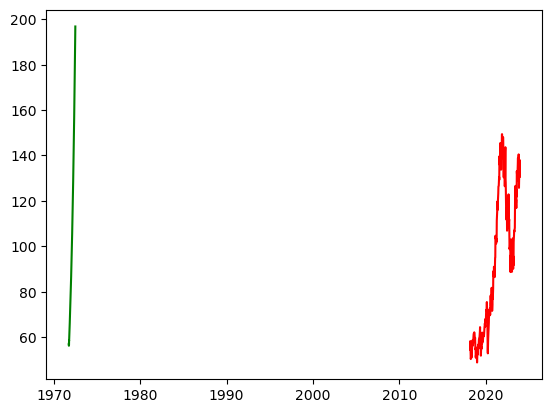

In [62]:
#ploting the predicted values
from matplotlib import pyplot
pyplot.plot(pred,color = 'green')
pyplot.plot(test_data, color='red')
print (pred)

In [63]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt (mean_squared_error(test_data, pred))

In [64]:
rmse

31.371262663064112

In [65]:
from sklearn.metrics import mean_absolute_percentage_error

In [66]:
def mape(x,y):
    return mean_absolute_percentage_error(x,y)*100

In [67]:
Ar_mape = mape(test_data, pred)
Ar_mape

26.56839814464899

In [68]:
pred_future=ARmodel.predict(start=len(df['Close']) +1,end=len (df['Close'])+7, dynamic=False)
print("The future prediction for the next week")
print (pred_future)
print('Number of Predictions Made: \t',len (pred_future))

The future prediction for the next week
910    198.693852
911    199.626798
912    200.564190
913    201.506048
914    202.452393
915    203.403247
916    204.358632
dtype: float64
Number of Predictions Made: 	 7


C:\Users\arunn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [69]:
#ARIMA

In [70]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings ("ignore")
stepwise_fit = auto_arima(df['Close'], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4053.322, Time=0.95 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4072.719, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4070.759, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4070.592, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4074.196, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4070.113, Time=0.38 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4070.007, Time=0.46 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=4053.885, Time=0.80 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=4053.342, Time=0.55 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4068.363, Time=0.30 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4062.521, Time=0.38 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4060.629, Time=0.42 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=4055.291, Time=1.07 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=4055.577, Time=0.58 sec

Best model:  ARIMA(2,1,2)(0,0,0)

In [71]:
from statsmodels.tsa.arima_model import ARIMA
model = sm.tsa.arima.ARIMA(train_data, order=(2,1,2))
result = model.fit()

In [72]:
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  636
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -802.428
Date:                Tue, 06 Feb 2024   AIC                           1614.856
Time:                        12:47:14   BIC                           1637.124
Sample:                             0   HQIC                          1623.503
                                - 636                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7340      0.289     -2.543      0.011      -1.300      -0.168
ar.L2          0.2658      0.288      0.924      0.356      -0.298       0.830
ma.L1          0.6379      0.275      2.318      0.020       0.098       1.177
ma.L2         -0.3612      0.272     -1.329      0.184      -0.894       0.172
sigma2         0.7326      0.032     22.694      0.000       0.669       0.796
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              2104.81
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               4.12   Skew:                             0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Date'>

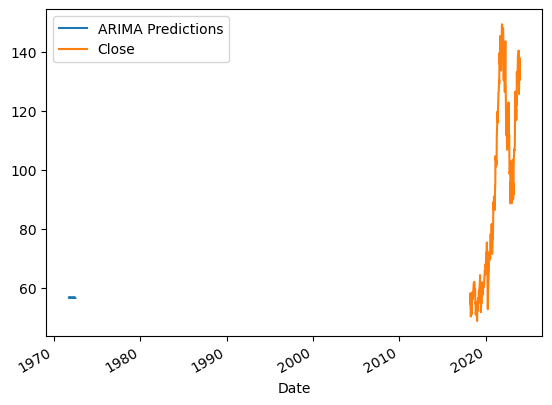

In [73]:
start=len(train_data)
end=len(train_data)+len(test_data)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test_data.plot(legend=True)

In [74]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test_data.mean()
rmsee=sqrt(mean_squared_error(pred,test_data))
print(rmsee)

47.12813702684217


In [75]:
Arima_mape = mape(pred,test_data)
Arima_mape 

63.110875172007574

In [76]:
#sarima

In [77]:
df

Close       SMA_5      SMA_15       EMA_5      EMA_15
Date                                                                  
2004-08-23    2.724787         NaN         NaN         NaN         NaN
2004-08-30    2.540727         NaN         NaN    2.724787    2.724787
2004-09-13    2.677464         NaN         NaN    2.624391    2.629788
2004-09-20    2.972857         NaN         NaN    2.645387    2.646716
2004-09-27    2.945460         NaN         NaN    2.750802    2.736306
...                ...         ...         ...         ...         ...
2023-11-06  131.449997  135.761999  132.814666  133.035462  124.604990
2023-11-13  133.639999  135.017999  133.240666  132.771218  125.032803
2023-11-20  137.919998  133.845999  134.024666  132.916014  125.570753
2023-11-27  138.050003  133.331998  134.345333  133.750012  126.342581
2023-12-04  130.630005  133.361999  134.752666  134.466677  127.074295

[909 rows x 5 columns]

In [78]:
train_data

Date
2004-08-23     2.724787
2004-08-30     2.540727
2004-09-13     2.677464
2004-09-20     2.972857
2004-09-27     2.945460
                ...    
2018-01-22    57.790501
2018-01-29    58.778999
2018-02-05    52.790001
2018-02-12    52.597000
2018-02-26    57.187500
Name: Close, Length: 636, dtype: float64

In [79]:
test_data

Date
2018-03-05     54.546501
2018-03-12     58.224998
2018-03-19     54.991001
2018-03-26     52.660500
2018-04-02     50.323502
                 ...    
2023-11-06    131.449997
2023-11-13    133.639999
2023-11-20    137.919998
2023-11-27    138.050003
2023-12-04    130.630005
Name: Close, Length: 273, dtype: float64

In [80]:
# the training set will include data to 2016-12-02
train =df['Close'][:'2016-12-02']
 
# test set will start from 2016-12-05
test =df['Close']['2016-12-05':]

In [81]:
train.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 581 entries, 2004-08-23 to 2016-11-28
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
581 non-null    float64
dtypes: float64(1)
memory usage: 9.1 KB


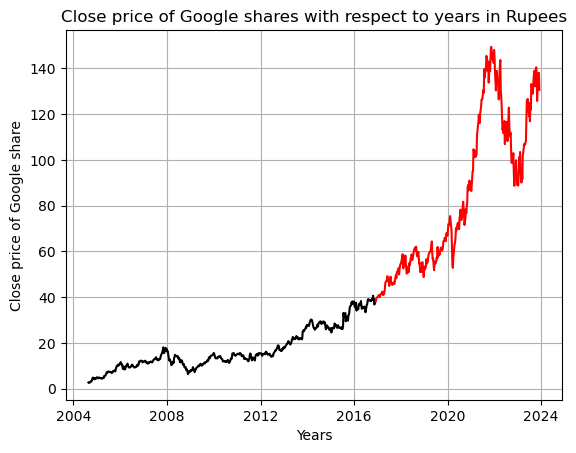

In [82]:
plt.plot(train, color = "black")
plt.plot(test, color = "red")
 
# title and axis captions
plt.title("Close price of Google shares with respect to years in Rupees")
plt.ylabel("Close price of Google share")
plt.xlabel('Years')
 
# add a grid
plt.grid()
 
plt.show()

In [83]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [84]:
# let's create an object of this model
model = SARIMAX(train, 
                order = (2, 1, 2), 
                seasonal_order = (2, 1, 2, 12),enforce_stationarity = False, 
                enforce_invertibility = False)
 
# apply the method fit
result = model.fit(maxiter = 500, method = 'nm')

In [85]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                  581
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -629.885
Date:                            Tue, 06 Feb 2024   AIC                           1277.770
Time:                                    12:47:28   BIC                           1316.411
Sample:                                         0   HQIC                          1292.881
                                            - 581                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8608      5.820     -0.148      0.882     -12.268      10.547
ar.L2         -0.1593      3.508     -0.045      0.964      -7.034       6.716
ma.L1          0.7772      5.817      0.134      0.894     -10.625      12.179
ma.L2          0.1355      3.038      0.045      0.964      -5.818       6.089
ar.S.L12      -0.6681      0.361     -1.852      0.064      -1.375       0.039
ar.S.L24      -0.1260      0.047     -2.694      0.007      -0.218      -0.034
ma.S.L12      -0.3956      0.357     -1.109      0.268      -1.095       0.304
ma.S.L24      -0.5304      0.353     -1.504      0.133      -1.221       0.161
sigma2         0.5774      0.019     30.536      0.000       0.540       0.614
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):              1497.91
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               2.38   Skew:                             0.59
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

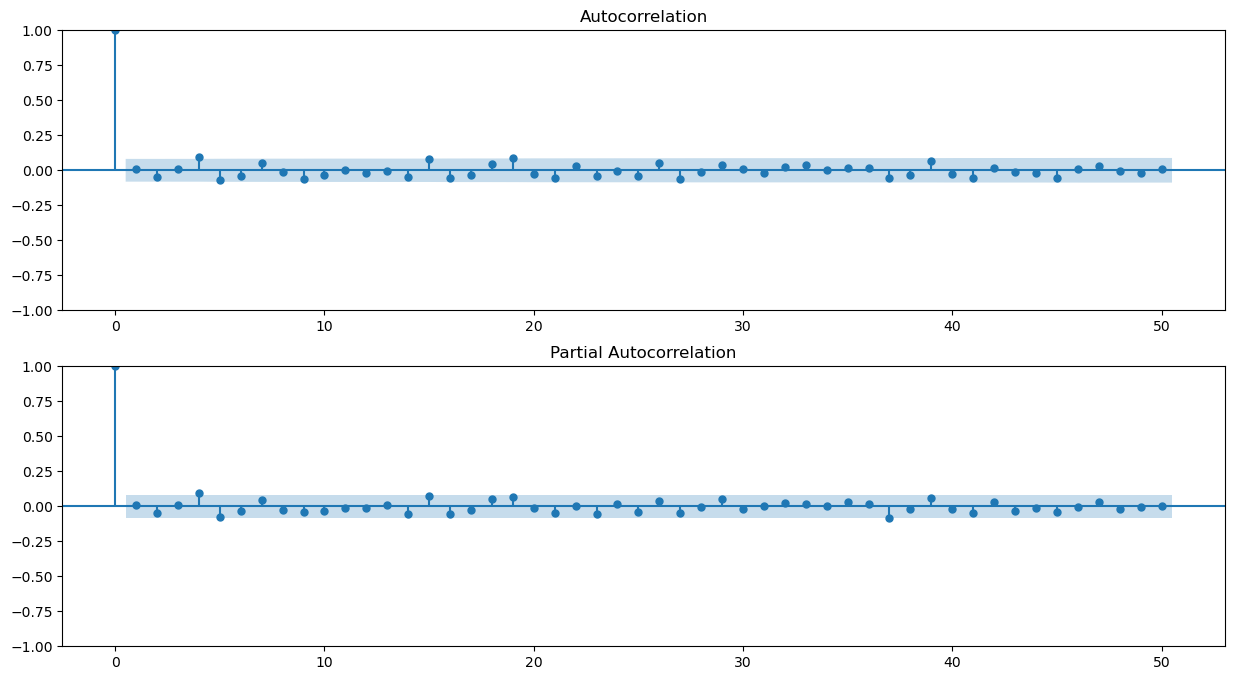

In [86]:
res = result.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=50, ax=ax[1])
plt.show()

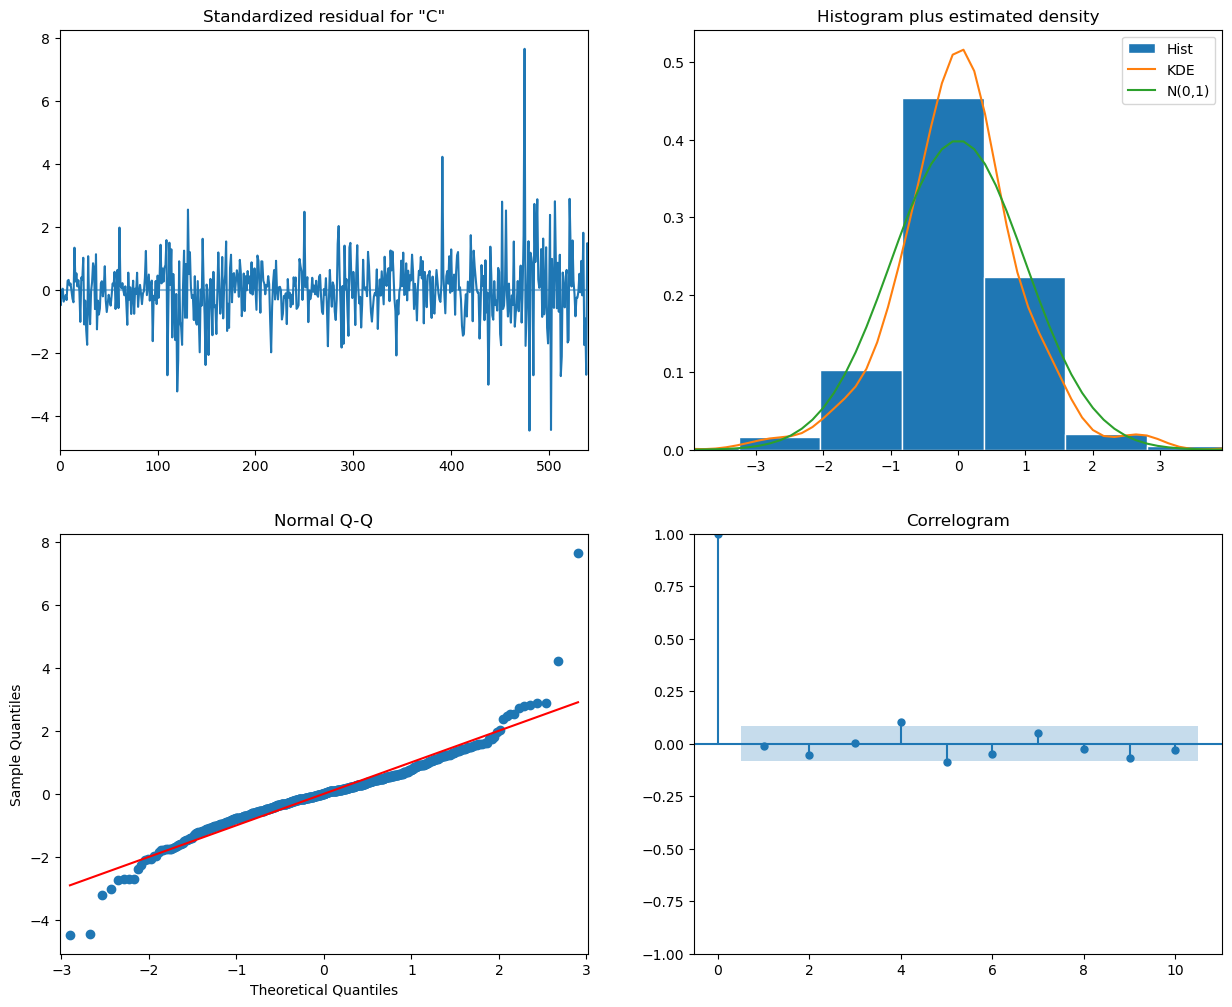

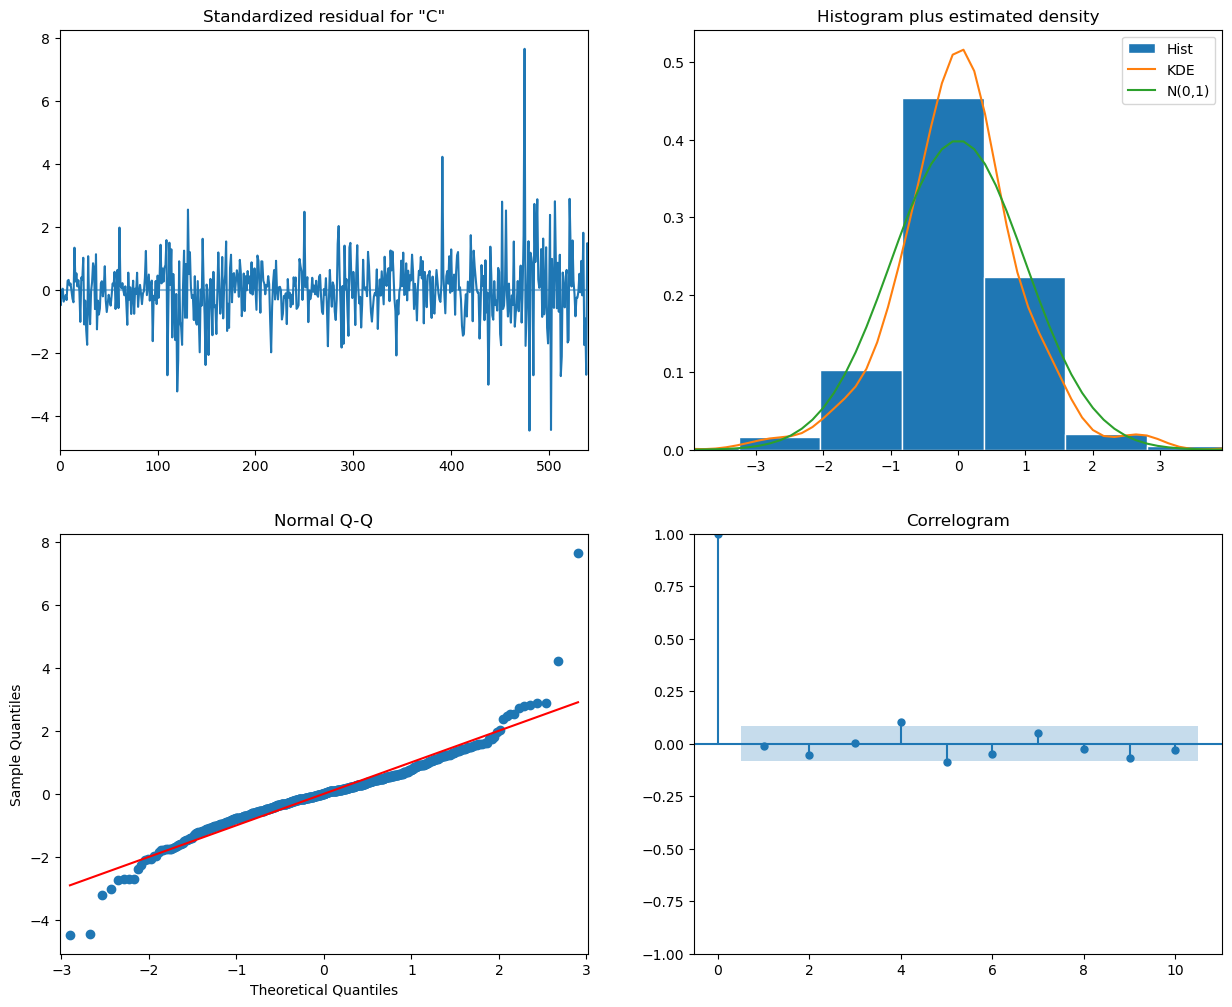

In [87]:
result.plot_diagnostics(figsize=(15, 12))

In [88]:
# the test forecast period will start from the end of the training period
start = len(train)
 
# and it will end at the end of the test
end = len(train) + len(test) - 1
  
# apply the method predict
predictions = result.predict(start, end)
predictions

581    38.672367
582    38.603633
583    38.717098
584    38.541667
585    38.653979
         ...    
904    63.127289
905    63.266526
906    63.207320
907    63.213830
908    63.031282
Name: predicted_mean, Length: 328, dtype: float64

In [89]:
predictions.info()

<class 'pandas.core.series.Series'>
RangeIndex: 328 entries, 581 to 908
Series name: predicted_mean
Non-Null Count  Dtype  
--------------  -----  
328 non-null    float64
dtypes: float64(1)
memory usage: 2.7 KB


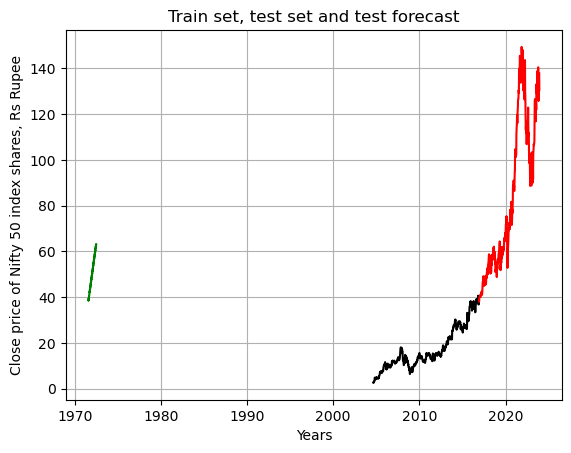

In [90]:
# we will output three curves (training, test set and test forecast)
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.plot(predictions, color = "green")
 
# title and axis captions
plt.title("Train set, test set and test forecast")
plt.ylabel("Close price of Nifty 50 index shares, Rs Rupee")
plt.xlabel('Years')
 
# add a grid
plt.grid()
 
plt.show()

In [91]:
# importing a metric
from sklearn.metrics import mean_squared_error
 
# calculate MSE
print('MSE = ', mean_squared_error(test, predictions))
 
# and RMSE
RMSEe = np.sqrt(mean_squared_error(test, predictions))
print('RMSEe = ',RMSEe )

MSE =  1842.8401357278901
RMSEe =  42.928313916666816


In [92]:
Sarimax_mape = mape(test, predictions)
Sarimax_mape

32.59804869471276

In [93]:
# forecast period from the end of available data
start = len(df.Close)
 
# and it will end 36 months later
end = (len(df.Close) - 1) + 5*12

forecast = result.predict(start, end)

forecast[-12:]

957    66.925393
958    66.921228
959    67.295904
960    67.379123
961    67.617166
962    67.489803
963    67.739986
964    67.672622
965    67.811859
966    67.752654
967    67.759163
968    67.576615
Name: predicted_mean, dtype: float64

In [94]:
forecast.info()

<class 'pandas.core.series.Series'>
RangeIndex: 60 entries, 909 to 968
Series name: predicted_mean
Non-Null Count  Dtype  
--------------  -----  
60 non-null     float64
dtypes: float64(1)
memory usage: 612.0 bytes


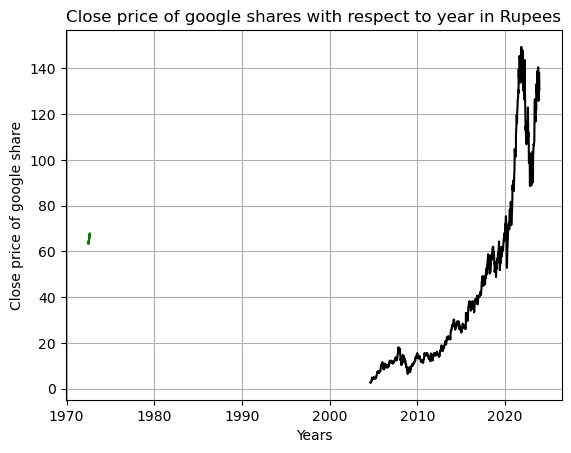

In [95]:
# output two curves (actual data and forecast for the future)
plt.plot(df.Close, color = 'black')
plt.plot(forecast, color = 'green')
 
# title and axis captions
plt.title("Close price of google shares with respect to year in Rupees")
plt.ylabel("Close price of google share")
plt.xlabel('Years')
 
# add a grid
plt.grid()
 
plt.show()

In [96]:
#comparing the model score

In [97]:
models = ['AutoReg','ARIMA','SARIMAX']
mp_acc = [Ar_mape,Arima_mape,Sarimax_mape]
lst_acc = [rmse,rmsee,RMSEe]
MSE = pd.DataFrame({'Model': models, 'Root_Mean_Squared_Error': lst_acc,'Mean_absolute_percentage_error':mp_acc})
MSE.sort_values(by="Root_Mean_Squared_Error")

Model  Root_Mean_Squared_Error  Mean_absolute_percentage_error
0  AutoReg                31.371263                       26.568398
2  SARIMAX                42.928314                       32.598049
1    ARIMA                47.128137                       63.110875